## Análise Dados da UFABC e ENEM 2023

In [1]:
from matplotlib.patches import Patch
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

In [2]:
from scipy import stats

### Carregamento de Dados

In [ ]:
# Leitura da chamada regular do SISU 2023
data = pd.read_csv("Bases/chamada_regular_sisu_2023_1.csv", sep='|', encoding='latin1', low_memory=False)

In [4]:
cr_sisu = data.copy()

In [5]:
cr_sisu.head()

,ANO,EDICAO,ETAPA,DS_ETAPA,CODIGO_IES,NOME_IES,SIGLA_IES,UF_IES,CODIGO_CAMPUS,NOME_CAMPUS,...,NOTA_L_COM_PESO,NOTA_CH_COM_PESO,NOTA_CN_COM_PESO,NOTA_M_COM_PESO,NOTA_R_COM_PESO,NOTA_CANDIDATO,NOTA_CORTE,CLASSIFICACAO,APROVADO,MATRICULA
0,2023,1,4,CHAMADA REGULAR,593,CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO S...,CEFET/RJ,RJ,1663,CEFET-RJ - MARIA DA GRAÇA,...,"601,3","605,3","1230,6","2652,8",2760,"713,64","728,6",32.0,N,PENDENTE
1,2023,1,4,CHAMADA REGULAR,593,CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO S...,CEFET/RJ,RJ,1663,CEFET-RJ - MARIA DA GRAÇA,...,"545,2","554,5","1108,2","2206,4",1440,"532,21","728,6",174.0,N,PENDENTE
2,2023,1,4,CHAMADA REGULAR,593,CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO S...,CEFET/RJ,RJ,1663,CEFET-RJ - MARIA DA GRAÇA,...,"593,5","645,9","1246,8","2878,8",2580,"722,27","728,6",19.0,N,PENDENTE
3,2023,1,4,CHAMADA REGULAR,593,CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO S...,CEFET/RJ,RJ,1663,CEFET-RJ - MARIA DA GRAÇA,...,"485,1","572,2","1052,4","2082,4",1800,"544,74","728,6",169.0,N,PENDENTE
4,2023,1,4,CHAMADA REGULAR,593,CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO S...,CEFET/RJ,RJ,1663,CEFET-RJ - MARIA DA GRAÇA,...,"631,3","604,8","1242,2","2692,4",1740,"628,25","728,6",127.0,N,PENDENTE


In [6]:
cr_sisu.columns

Index(['ANO', 'EDICAO', 'ETAPA', 'DS_ETAPA', 'CODIGO_IES', 'NOME_IES',
       'SIGLA_IES', 'UF_IES', 'CODIGO_CAMPUS', 'NOME_CAMPUS', 'UF_CAMPUS',
       'MUNICIPIO_CAMPUS', 'CODIGO_CURSO', 'NOME_CURSO', 'GRAU', 'TURNO',
       'DS_PERIODICIDADE', 'TP_COTA', 'TIPO_MOD_CONCORRENCIA',
       'MOD_CONCORRENCIA', 'QT_VAGAS_CONCORRENCIA', 'PERCENTUAL_BONUS',
       'PESO_L', 'PESO_CH', 'PESO_CN', 'PESO_M', 'PESO_R', 'NOTA_MINIMA_L',
       'NOTA_MINIMA_CH', 'NOTA_MINIMA_CN', 'NOTA_MINIMA_M', 'NOTA_MINIMA_R',
       'MEDIA_MINIMA', 'CPF', 'INSCRICAO_ENEM', 'INSCRITO', 'SEXO',
       'DT_NASCIMENTO', 'UF_CANDIDATO', 'MUNICIPIO_CANDIDATO', 'OPCAO',
       'NOTA_L', 'NOTA_CH', 'NOTA_CN', 'NOTA_M', 'NOTA_R', 'NOTA_L_COM_PESO',
       'NOTA_CH_COM_PESO', 'NOTA_CN_COM_PESO', 'NOTA_M_COM_PESO',
       'NOTA_R_COM_PESO', 'NOTA_CANDIDATO', 'NOTA_CORTE', 'CLASSIFICACAO',
       'APROVADO', 'MATRICULA'],
      dtype='object')

In [7]:
# Lista de cores Para os Gráficos
colors = [
    '#1f77b4',  # azul
    '#ff7f0e',  # laranja
    '#6baed6',  # azul claro
    '#fd8d3c',  # laranja claro
    '#08306b',  # azul escuro
    '#d94801',  # laranja escuro
    '#9ecae1',  # azul pastel
    '#fdae6b',  # laranja pastel
]

### Tratamento de Dados

In [8]:
# Converter a nota do candidato e nota de corte para float
cr_sisu["NOTA_CANDIDATO"] = cr_sisu["NOTA_CANDIDATO"].str.replace(",", ".", regex=False).astype(float)
cr_sisu["NOTA_CORTE"] = cr_sisu["NOTA_CORTE"].str.replace(",", ".", regex=False).astype(float)

In [9]:
# Filtrar a Leitura da chamada regular do SISU para apenas UFABC
cr_sisu_ufabc = cr_sisu[cr_sisu["NOME_IES"].str.contains("FUNDAÇÃO UNIVERSIDADE FEDERAL DO ABC", case=False, na=False)]

# Filtrar o curso de Ciência e Tecnologia
cr_sisu_ufabc_bct = cr_sisu_ufabc[cr_sisu_ufabc["NOME_CURSO"].str.contains("CIÊNCIA E TECNOLOGIA", case=False, na=False)]

### Análise descritiva simples

In [10]:
# Ver distribuição por turno
print(cr_sisu_ufabc_bct["TURNO"].value_counts())

TURNO
Noturno     3843
Matutino    3260
Name: count, dtype: int64


### **Questão 1: Qual é a média das notas de cada modalidade?**

In [11]:
nota_media = cr_sisu_ufabc_bct.groupby("MOD_CONCORRENCIA")["NOTA_CANDIDATO"].mean().reset_index()

nota_media.columns = ['Modalidade', 'Média']
nota_media

,Modalidade,Média
0,Ampla concorrência,663.134582
1,"Candidatos autodeclarados pretos, pardos ou in...",586.806579
2,"Candidatos autodeclarados pretos, pardos ou in...",617.578094
3,Candidatos com deficiência autodeclarados pret...,572.748333
4,Candidatos com deficiência autodeclarados pret...,578.185000
5,Candidatos com deficiência que tenham renda fa...,581.886667
6,"Candidatos com deficiência que, independenteme...",620.367647
7,Candidatos com renda familiar bruta per capita...,611.878875
8,"Candidatos que, independentemente da renda (ar...",635.387888
9,Pessoas Transgêneras em situação de Vulnerabil...,581.390000


In [12]:
grupos = cr_sisu_ufabc_bct["MOD_CONCORRENCIA"].unique()

In [13]:
amostras = [
    cr_sisu_ufabc_bct[cr_sisu_ufabc_bct["MOD_CONCORRENCIA"] == grupo]["NOTA_CANDIDATO"]
    for grupo in grupos
    if len(cr_sisu_ufabc_bct[cr_sisu_ufabc_bct["MOD_CONCORRENCIA"] == grupo]) > 1
]

In [14]:
if len(amostras) >= 2:
    f_stat, p_valor = stats.f_oneway(*amostras)
    print(f'Estatística F: {f_stat:.4f}')
    print(f'Valor-p: {p_valor:.4f}')
    if p_valor < 0.05:
        print('Resultado: Há diferença significativa entre as notas entre os grupos.')
    else:
        print('Resultado: Não há diferença significativa entre as notas entre os grupos.')
else:
    print('Erro: Menos de dois grupos válidos com mais de uma observação.')

Estatística F: 154.1865
Valor-p: 0.0000
Resultado: Há diferença significativa entre as notas entre os grupos.


#### Percebe-se que existe sim uma diferença significativa entre os grupos, principalmente ao vermos a tabela de notas médias por modalidade e ao aplicarmos o teste de hipótese anova, aonde o valor-p fica 0 indicando a diferença e rejeitando a hipótese nula, além de olharmos que a variância é de 154 entre grupos e muito menor dentro dos grupos (diferença muito alta).

### **Questão 2: Qual é a relação entre concorrência (número de candidatos por vaga) e nota de corte em cada modalidade?**

In [ ]:
df_prograd = pd.read_csv('Bases/bd_prograd01_2023.csv', sep=';', encoding='latin1')

In [16]:
df_prograd['nota'] = df_prograd['nota'].astype(str).str.replace(',', '.', regex=False).astype(float)

df_bct = df_prograd[df_prograd['opção de curso'].str.contains(
    'BACHARELADO EM CIÊNCIA E TECNOLOGIA', case=False, na=False)]

media = df_bct.groupby(['opção de campus', 'opção de turno', 'modalidade inscrição'])[
    'nota'].mean().reset_index()

media

,opção de campus,opção de turno,modalidade inscrição,nota
0,SANTO ANDRÉ,MATUTINO,A0 - Ampla concorrência,689.253868
1,SANTO ANDRÉ,MATUTINO,L1 - Escola Pública + Renda,625.714403
2,SANTO ANDRÉ,MATUTINO,L10 - Escola Pública + PCD + Renda + PPI,622.950000
3,SANTO ANDRÉ,MATUTINO,L13 - Escola Pública + PCD,603.856667
4,SANTO ANDRÉ,MATUTINO,L14 - Escola Pública + PCD + PPI,540.480000
5,SANTO ANDRÉ,MATUTINO,L2 - Escola Pública + Renda + PPI,598.153214
6,SANTO ANDRÉ,MATUTINO,L5 - Escola Pública,649.094612
7,SANTO ANDRÉ,MATUTINO,L6 - Escola Pública + PPI,629.419146
8,SANTO ANDRÉ,MATUTINO,V7750 - Pessoa Transgênera,630.642500
9,SANTO ANDRÉ,MATUTINO,V7751 - PCD,603.051667


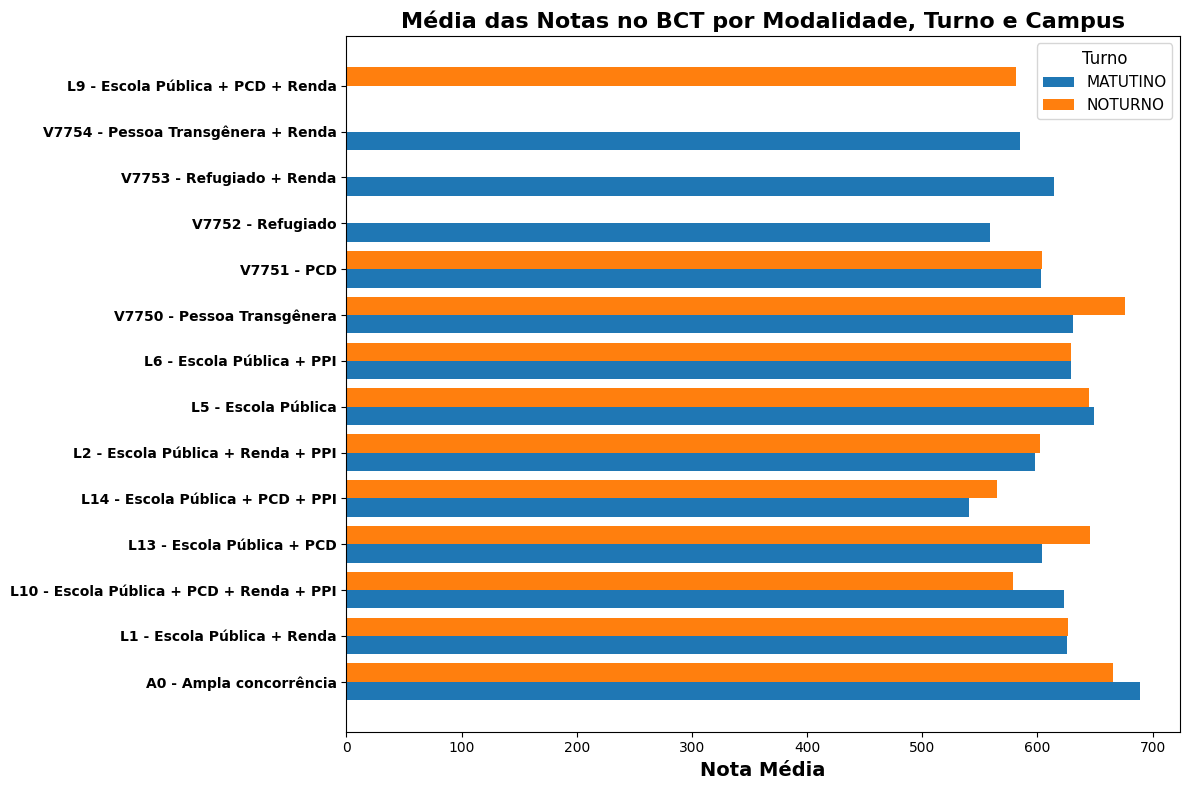

In [17]:
turnos = media['opção de turno'].unique()
modalidades = media['modalidade inscrição'].unique()

# Preparar posições para as barras
y_pos = np.arange(len(modalidades))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(12, 8))

for i, turno in enumerate(turnos):
    subset = media[media['opção de turno'] == turno]
    # Garantir alinhamento das barras por modalidade
    notas = [subset[subset['modalidade inscrição'] == m]['nota'].values[0] if m in subset['modalidade inscrição'].values else 0 for m in modalidades]
    ax.barh(y_pos + i*bar_width, notas, height=bar_width, label=turno)

ax.set_yticks(y_pos + bar_width * (len(turnos)-1) / 2)
ax.set_yticklabels(modalidades, fontweight='bold')
ax.set_xlabel('Nota Média', fontweight='bold', fontsize=14)
ax.set_title('Média das Notas no BCT por Modalidade, Turno e Campus', fontweight='bold', fontsize=16)
ax.legend(title='Turno', fontsize=11, title_fontsize=12)
ax.grid(False)

plt.tight_layout()
plt.show()

### As políticas de cotas ampliam significativamente o acesso à universidade. No entanto, os dados revelam que esses candidatos ainda apresentam, em média, notas inferiores, evidenciando que desigualdades estruturais anteriores ao ingresso persistem e impactam o desempenho acadêmico.

In [18]:
candidatos = df_bct.groupby(['opção de campus', 'opção de turno',
                            'modalidade inscrição']).size().reset_index(name='num_candidatos')

convocados_regulares = df_bct[df_bct['chamada'].str.contains(
    'Regular', na=False)]

vagas = convocados_regulares.groupby(
    ['opção de campus', 'opção de turno', 'modalidade inscrição']).size().reset_index(name='num_vagas')

nota_corte = convocados_regulares.groupby(['opção de campus', 'opção de turno', 'modalidade inscrição'])[
    'nota'].min().reset_index(name='nota_de_corte')

concorrencia = candidatos.merge(
    vagas, on=['opção de campus', 'opção de turno', 'modalidade inscrição'], how='left')
concorrencia = concorrencia.merge(nota_corte, on=[
                                  'opção de campus', 'opção de turno', 'modalidade inscrição'], how='left')

concorrencia['candidatos_por_vaga'] = concorrencia['num_candidatos'] / concorrencia['num_vagas']

In [19]:
a = concorrencia['num_vagas'].sum()

print('Número de Vagas para o BC&T:', a)

Número de Vagas para o BC&T: 1337


In [20]:
concorrencia

,opção de campus,opção de turno,modalidade inscrição,num_candidatos,num_vagas,nota_de_corte,candidatos_por_vaga
0,SANTO ANDRÉ,MATUTINO,A0 - Ampla concorrência,530,216,717.52,2.453704
1,SANTO ANDRÉ,MATUTINO,L1 - Escola Pública + Renda,159,76,639.86,2.092105
2,SANTO ANDRÉ,MATUTINO,L10 - Escola Pública + PCD + Renda + PPI,1,1,622.95,1.000000
3,SANTO ANDRÉ,MATUTINO,L13 - Escola Pública + PCD,3,3,577.73,1.000000
4,SANTO ANDRÉ,MATUTINO,L14 - Escola Pública + PCD + PPI,1,1,540.48,1.000000
5,SANTO ANDRÉ,MATUTINO,L2 - Escola Pública + Renda + PPI,84,41,606.88,2.048780
6,SANTO ANDRÉ,MATUTINO,L5 - Escola Pública,219,75,686.95,2.920000
7,SANTO ANDRÉ,MATUTINO,L6 - Escola Pública + PPI,82,41,641.18,2.000000
8,SANTO ANDRÉ,MATUTINO,V7750 - Pessoa Transgênera,4,4,614.28,1.000000
9,SANTO ANDRÉ,MATUTINO,V7751 - PCD,6,6,551.15,1.000000


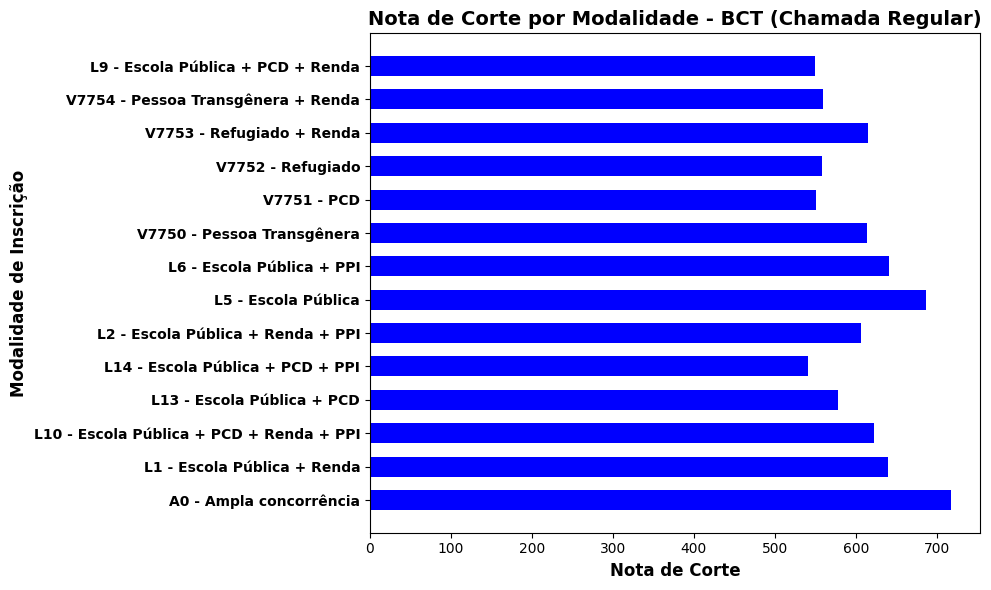

In [21]:
modalidades = nota_corte['modalidade inscrição'].unique()
y_pos = np.arange(len(modalidades))
bar_height = 0.6

fig, ax = plt.subplots(figsize=(10, 6))

notas = [nota_corte[nota_corte['modalidade inscrição'] == m]['nota_de_corte'].values[0] if m in nota_corte['modalidade inscrição'].values else 0 for m in modalidades]

ax.barh(y_pos, notas, height=bar_height, color='blue')

ax.set_yticks(y_pos)
ax.set_yticklabels(modalidades, fontweight='bold')
ax.set_xlabel('Nota de Corte', fontweight='bold', fontsize=12)
ax.set_ylabel('Modalidade de Inscrição', fontweight='bold', fontsize=12)
ax.set_title('Nota de Corte por Modalidade - BCT (Chamada Regular)', fontweight='bold', fontsize=14)

ax.grid(False)
plt.tight_layout()
plt.show()

### As notas de corte variam conforme a modalidade de ingresso no BCT – candidatos da ampla concorrência apresentaram maior nota média, enquanto grupos com múltiplos critérios de vulnerabilidade (como renda, escola pública, PCD e PPI) obtiveram as menores notas.

### **Questão 3: Qual a proporção de candidatos por tipo de escola (pública/privada)?**

In [22]:
def classificar_escola(modalidade):
    if "escolas públicas" in str(modalidade).lower():
        return "Escola Pública"
    elif "ampla concorrência" in str(modalidade).lower():
        return "Escola Privada ou Não Declarado"
    else:
        return "Escola Pública"

In [23]:
cr_sisu_ufabc = cr_sisu_ufabc.copy()  # Faz uma cópia segura
cr_sisu_ufabc["TIPO_ESCOLA"] = cr_sisu_ufabc["MOD_CONCORRENCIA"].apply(classificar_escola)

In [24]:
# Contar proporção
distribuicao = cr_sisu_ufabc["TIPO_ESCOLA"].value_counts(normalize=True) * 100

df = distribuicao.reset_index()
df.columns = ['Tipo de Escola', 'Proporção %']
df

,Tipo de Escola,Proporção %
0,Escola Pública,50.910176
1,Escola Privada ou Não Declarado,49.089824


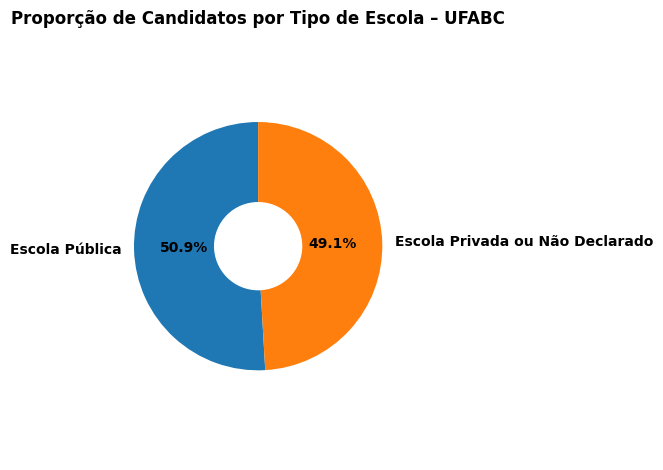

In [25]:
# Função para deixar as porcentagens em negrito
def func_autopct(pct):
    return f'{pct:.1f}%'

fig, ax = plt.subplots()
distribuicao.plot(
    kind='pie',
    autopct=lambda pct: f'{pct:.1f}%',  # mantém as % e depois a gente deixa bold no texto manualmente
    startangle=90,
    colors=colors,
    ylabel="",
    ax=ax,
    textprops={'weight':'bold'}  # deixa bold o texto das porcentagens e labels
)

# Criar o "buraco" no meio para virar uma rosca
centro = plt.Circle((0, 0), 0.35, color='white')
fig.gca().add_artist(centro)

# Título em negrito
ax.set_title("Proporção de Candidatos por Tipo de Escola – UFABC", fontweight='bold')

ax.axis('equal')
plt.tight_layout()
plt.show()

### Apesar da distribuição equilibrada entre os tipos de escola, observa-se uma média de nota superior entre os candidatos oriundos da rede privada ou não declarada.

### **Questão 4: Candidatos de escolas públicas possuem, em média, notas mais baixas do que os de escolas privadas?**

In [26]:
media_escola = cr_sisu_ufabc.groupby("TIPO_ESCOLA")["NOTA_CANDIDATO"].mean().sort_values(ascending=False)

df_media = media_escola.reset_index()
df_media.columns = ['Tipo de Escola', 'Média das Notas']

df_media

,Tipo de Escola,Média das Notas
0,Escola Privada ou Não Declarado,661.968454
1,Escola Pública,617.980336


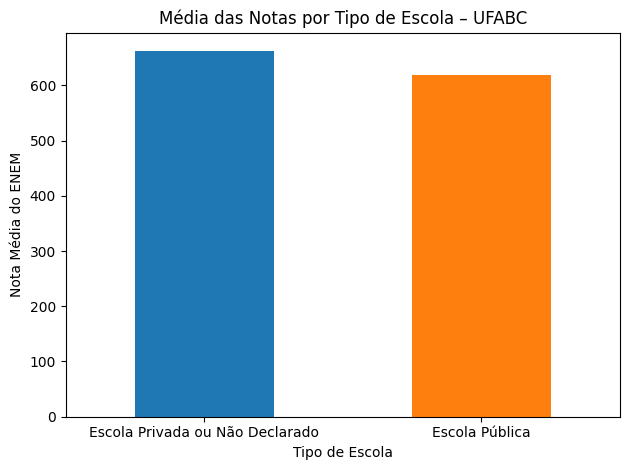

In [27]:
# Plotar gráfico de barras
cores_escola = ['#2196F3', '#4CAF50']  # Azul = Privada/Não declarado, Verde = Pública
media_escola.plot(kind="bar", color=colors)
plt.title("Média das Notas por Tipo de Escola – UFABC")
plt.ylabel("Nota Média do ENEM")
plt.xlabel("Tipo de Escola")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Estudantes de escolas privadas ou não declaradas apresentaram maior média de notas do ENEM do que os de escolas públicas, evidenciando desigualdades no preparo educacional.

In [28]:
grupos = cr_sisu_ufabc["TIPO_ESCOLA"].unique()
amostras = [
    cr_sisu_ufabc[cr_sisu_ufabc["TIPO_ESCOLA"] == grupo]["NOTA_CANDIDATO"]
    for grupo in grupos
    if len(cr_sisu_ufabc[cr_sisu_ufabc["TIPO_ESCOLA"] == grupo]) > 1
]
if len(amostras) >= 2:
    f_stat, p_valor = stats.f_oneway(*amostras)
    print(f'Estatística F: {f_stat:.4f}')
    print(f'Valor-p: {p_valor:.4f}')
    if p_valor < 0.05:
        print('Resultado: Há diferença significativa entre as notas entre os grupos.')
    else:
        print('Resultado: Não há diferença significativa entre as notas entre os grupos.')
else:
    print('Erro: Menos de dois grupos válidos com mais de uma observação.')

Estatística F: 1953.1681
Valor-p: 0.0000
Resultado: Há diferença significativa entre as notas entre os grupos.


#### Podemos ver ao comparar os grupos no gráfico de barras que existe uma diferença, porém ao fazer o teste de hipótese ANOVA, podemos perceber que o valor-p se mostra ridiculamente próximo de 0, rejeitando a hipótese de não existir diferença significativa entre médias de grupos. Também ao vermos a estatísitca F, vemos que a variância entre grupos é alta comparada a variância dentro dos grupos.

### **Questão 5: Quais foram as notas de corte em cada curso e modalidade?**

In [29]:
df_prograd['nota'] = df_prograd['nota'].astype(str).str.replace(',', '.', regex=False).astype(float)

media = df_prograd.groupby(['opção de curso', 'opção de campus', 'opção de turno', 'modalidade inscrição'])[
    'nota'].mean().reset_index()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(media)

,opção de curso,opção de campus,opção de turno,modalidade inscrição,nota
0,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,A0 - Ampla concorrência,689.253868
1,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,L1 - Escola Pública + Renda,625.714403
2,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,L10 - Escola Pública + PCD + Renda + PPI,622.950000
3,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,L13 - Escola Pública + PCD,603.856667
4,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,L14 - Escola Pública + PCD + PPI,540.480000
5,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,L2 - Escola Pública + Renda + PPI,598.153214
6,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,L5 - Escola Pública,649.094612
7,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,L6 - Escola Pública + PPI,629.419146
8,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,V7750 - Pessoa Transgênera,630.642500
9,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,V7751 - PCD,603.051667


In [30]:
candidatos = df_prograd.groupby(['opção de curso','opção de campus', 'opção de turno',
                            'modalidade inscrição']).size().reset_index(name='num_candidatos')

convocados_regulares = df_prograd[df_prograd['chamada'].str.contains(
    'Regular', na=False)]

vagas = convocados_regulares.groupby(
    ['opção de curso','opção de campus', 'opção de turno', 'modalidade inscrição']).size().reset_index(name='num_vagas')

nota_corte = convocados_regulares.groupby(['opção de curso','opção de campus', 'opção de turno', 'modalidade inscrição'])[
    'nota'].min().reset_index(name='nota_de_corte')

concorrencia = candidatos.merge(
    vagas, on=['opção de curso', 'opção de campus', 'opção de turno', 'modalidade inscrição'], how='left')
concorrencia = concorrencia.merge(nota_corte, on=['opção de curso',
                                  'opção de campus', 'opção de turno', 'modalidade inscrição'], how='left')

concorrencia['candidatos_por_vaga'] = concorrencia['num_candidatos'] / concorrencia['num_vagas']

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(concorrencia)

,opção de curso,opção de campus,opção de turno,modalidade inscrição,num_candidatos,num_vagas,nota_de_corte,candidatos_por_vaga
0,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,A0 - Ampla concorrência,530,216,717.52,2.453704
1,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,L1 - Escola Pública + Renda,159,76,639.86,2.092105
2,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,L10 - Escola Pública + PCD + Renda + PPI,1,1,622.95,1.000000
3,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,L13 - Escola Pública + PCD,3,3,577.73,1.000000
4,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,L14 - Escola Pública + PCD + PPI,1,1,540.48,1.000000
5,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,L2 - Escola Pública + Renda + PPI,84,41,606.88,2.048780
6,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,L5 - Escola Pública,219,75,686.95,2.920000
7,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,L6 - Escola Pública + PPI,82,41,641.18,2.000000
8,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,V7750 - Pessoa Transgênera,4,4,614.28,1.000000
9,BACHARELADO EM CIÊNCIA E TECNOLOGIA,SANTO ANDRÉ,MATUTINO,V7751 - PCD,6,6,551.15,1.000000


### As notas de corte variam entre cursos e modalidades. Candidatos da ampla concorrência têm, em geral, as maiores notas, enquanto grupos com perfil socioeconômico mais vulnerável apresentam notas de corte menores, refletindo desigualdades no acesso ao ensino superior.

### **Questão 6: A localização geográfica (por exemplo, estado ou região do país) influencia a nota média do ENEM?**

In [31]:
# Calcula o número de  candidatos por estado
candidatos_por_estado = cr_sisu_ufabc.groupby("UF_CANDIDATO")["NOTA_CANDIDATO"].agg(['mean', 'count']).reset_index()
candidatos_por_estado.columns = ['Estado', 'Nota Média', 'Nº de Candidatos']

In [32]:
# Ordenar por nota média
candidatos_por_estado = candidatos_por_estado.sort_values(by="Nota Média", ascending=True)

In [33]:
# Criar colormap laranja -> azul
colorscale = mcolors.LinearSegmentedColormap.from_list("laranja_azul", ['#FF9800', '#2196F3'])

# Normalizar pelo número de candidatos (menor laranja, maior azul)
norm = plt.Normalize(candidatos_por_estado['Nº de Candidatos'].min(), candidatos_por_estado['Nº de Candidatos'].max())

# Gerar cores para as barras com base no Nº de Candidatos
cores = colorscale(norm(candidatos_por_estado['Nº de Candidatos'].values))

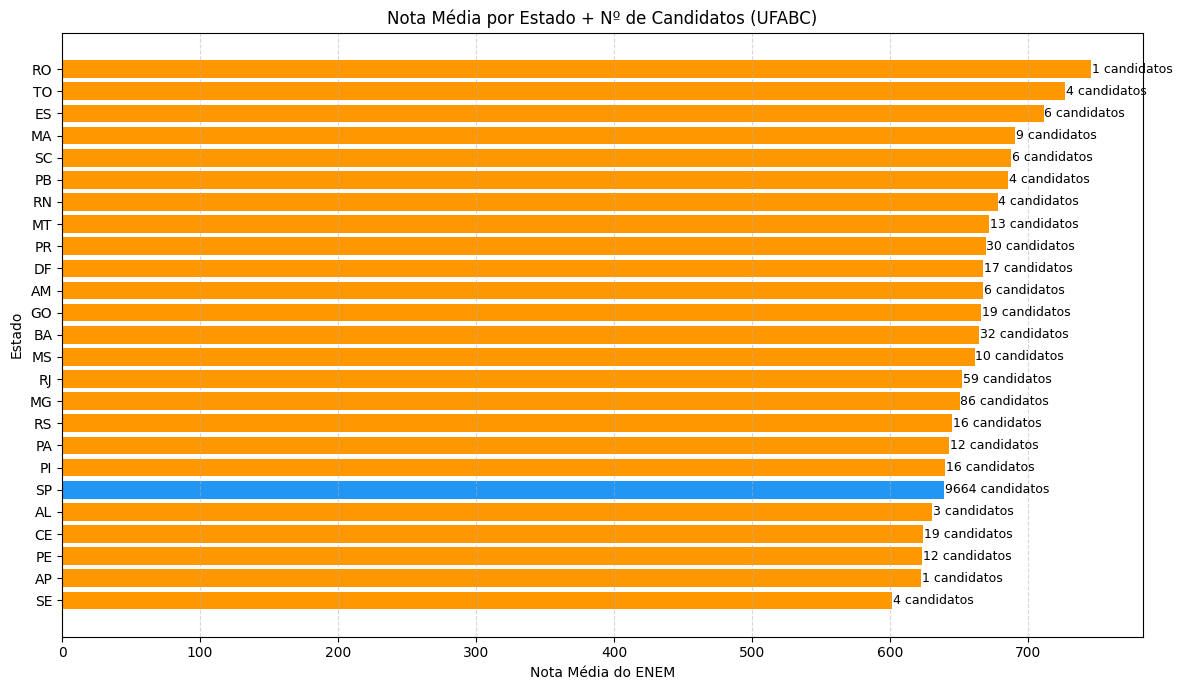

In [34]:
# Plot
plt.figure(figsize=(12, 7))
bars = plt.barh(candidatos_por_estado['Estado'], candidatos_por_estado['Nota Média'], color=cores)

# Adicionar rótulos com número de candidatos
for i, (nota, count) in enumerate(zip(candidatos_por_estado['Nota Média'], candidatos_por_estado['Nº de Candidatos'])):
    plt.text(nota + 0.5, i, f'{count} candidatos', va='center', fontsize=9)

plt.title("Nota Média por Estado + Nº de Candidatos (UFABC)")
plt.xlabel("Nota Média do ENEM")
plt.ylabel("Estado")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Apesar da diversidade regional, a concentração em São Paulo revela desigualdades no acesso e nas oportunidades educacionais entre os estados.

In [35]:
grupos = cr_sisu_ufabc['UF_CANDIDATO'].unique()
amostras = [
    cr_sisu_ufabc[cr_sisu_ufabc["UF_CANDIDATO"] == grupo]["NOTA_CANDIDATO"]
    for grupo in grupos
    if len(cr_sisu_ufabc[cr_sisu_ufabc["UF_CANDIDATO"] == grupo]) > 1
]
if len(amostras) >= 2:
    f_stat, p_valor = stats.f_oneway(*amostras)
    print(f'Estatística F: {f_stat:.4f}')
    print(f'Valor-p: {p_valor:.4f}')
    if p_valor < 0.05:
        print('Resultado: Há diferença significativa entre as notas entre os grupos.')
    else:
        print('Resultado: Não há diferença significativa entre as notas entre os grupos.')
else:
    print('Erro: Menos de dois grupos válidos com mais de uma observação.')

Estatística F: 3.7812
Valor-p: 0.0000
Resultado: Há diferença significativa entre as notas entre os grupos.


#### Podemos ver ao comparar os grupos no gráfico de barras que existe uma diferença, porém ao fazer o teste de hipótese ANOVA, podemos perceber que o valor-p se mostra ridiculamente próximo de 0, rejeitando a hipótese de não existir diferença significativa entre médias de grupos. Também ao vermos a estatísitca F, vemos que a variância entre grupos é alta comparada a variância dentro dos grupos.

### Questão 7: As cotas estão efetivamente equilibrando as chances entre diferentes grupos?

In [36]:
nota_media = cr_sisu_ufabc_bct.groupby("MOD_CONCORRENCIA")["NOTA_CANDIDATO"].mean().sort_values(ascending=False).reset_index()

nota_media.columns = ['Modalidade', 'Média']
nota_media

,Modalidade,Média
0,Ampla concorrência,663.134582
1,"Candidatos que, independentemente da renda (ar...",635.387888
2,"Refugiados e Solicitantes de Refúgio, independ...",630.835000
3,"Pessoas Transgêneras, independentemente de ren...",626.985652
4,"Candidatos com deficiência que, independenteme...",620.367647
5,"Candidatos autodeclarados pretos, pardos ou in...",617.578094
6,Refugiados e Solicitantes de Refúgio em situaç...,614.700000
7,Pessoas com Deficiência,614.698696
8,Candidatos com renda familiar bruta per capita...,611.878875
9,"Candidatos autodeclarados pretos, pardos ou in...",586.806579


In [37]:
nota_media['Sigla'] = [f"{i+1:02d}" for i in range(len(nota_media))]

In [38]:
nota_media = nota_media[['Sigla', 'Modalidade', 'Média']]

In [39]:
# Garante que tenha cores suficientes (repetindo se necessário)
colors = plt.cm.tab20.colors  # Retorna uma tupla com 20 cores

# Se ainda assim não for suficiente, multiplica:
colors = list(colors) * (len(nota_media) // len(colors) + 1)

C:\Users\acsfp\AppData\Local\Temp\ipykernel_12684\1610413920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nota_media['Label'] = nota_media['Sigla'] + ' – ' + nota_media['Modalidade'].str.split(',').str[0]


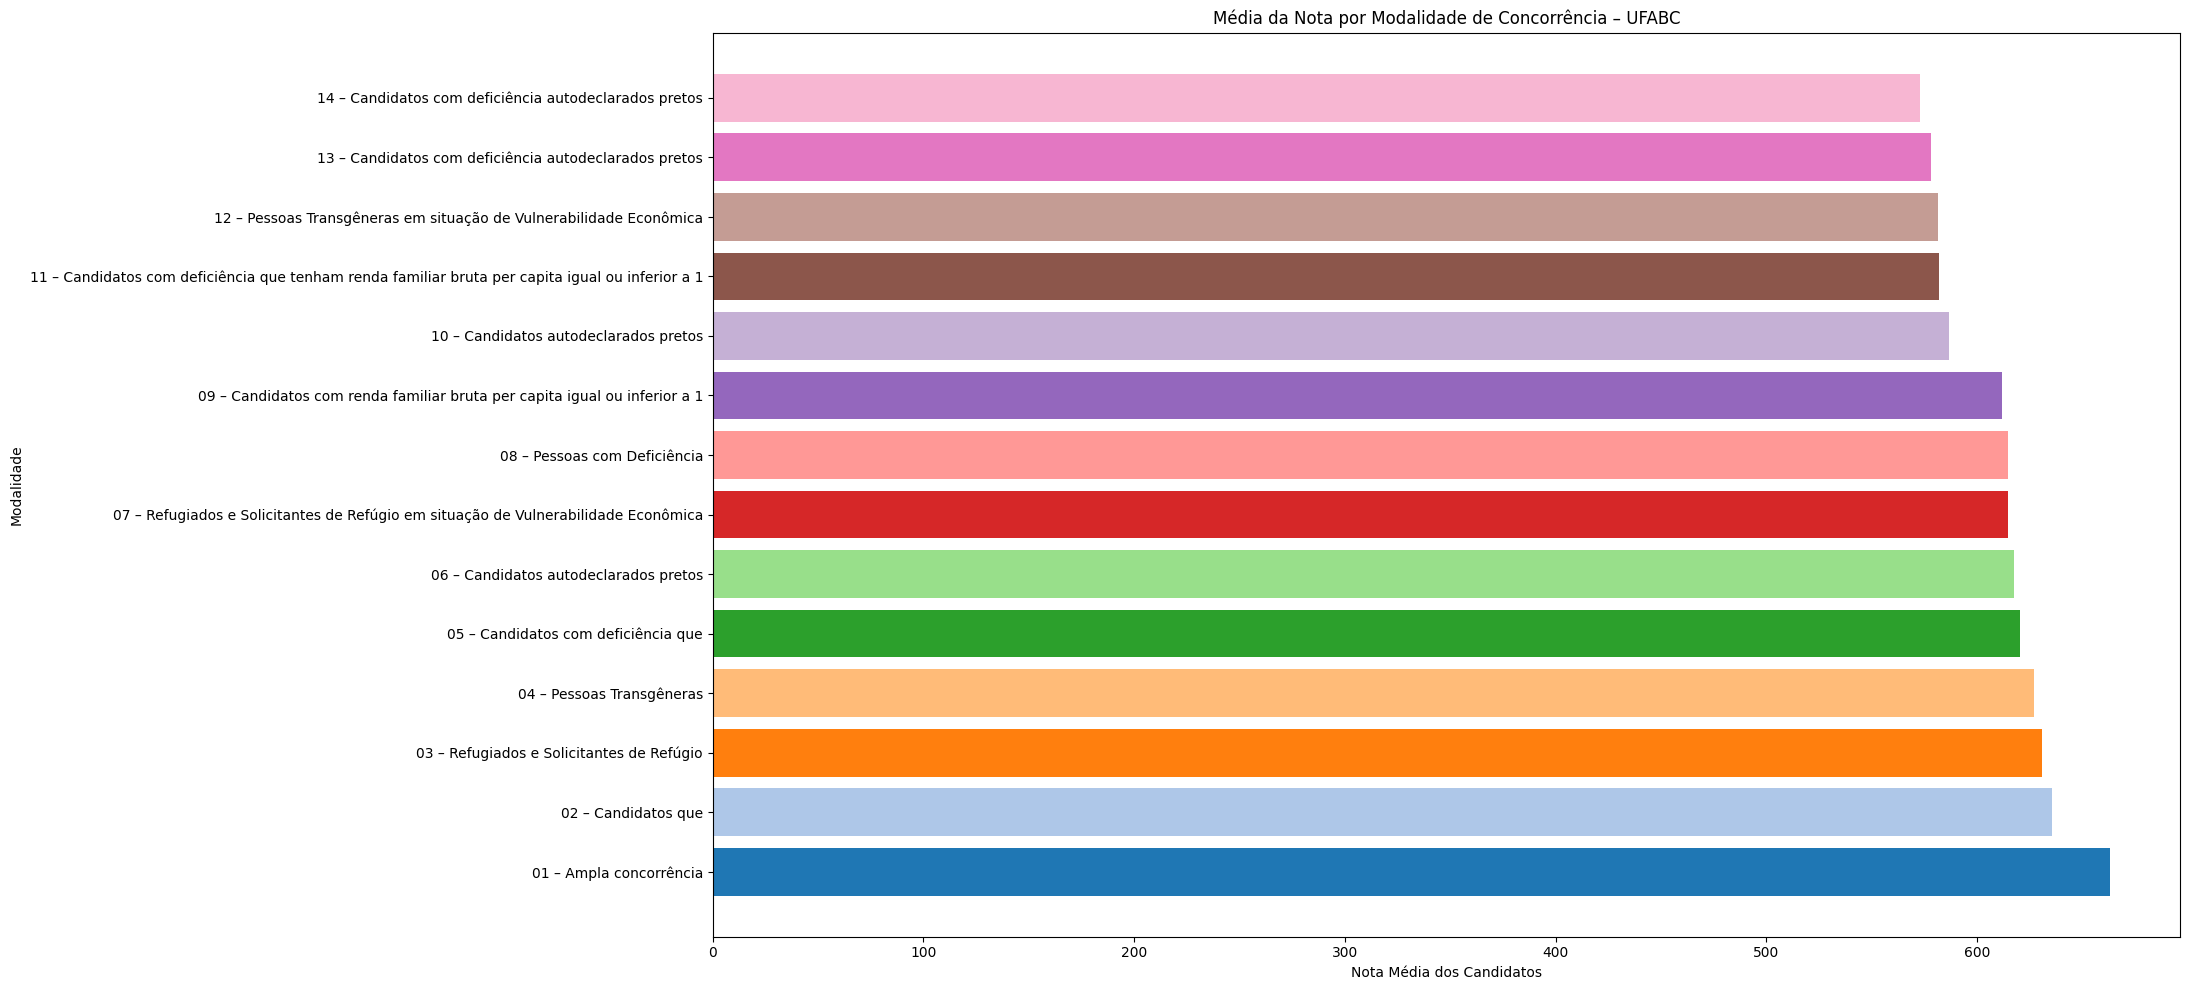

In [40]:
# Substituir o eixo y por sigla + nome resumido
nota_media['Label'] = nota_media['Sigla'] + ' – ' + nota_media['Modalidade'].str.split(',').str[0]

plt.figure(figsize=(22, 10))
plt.barh(nota_media["Label"], nota_media["Média"], color=colors[:len(nota_media)])
plt.title("Média da Nota por Modalidade de Concorrência – UFABC")
plt.xlabel("Nota Média dos Candidatos")
plt.ylabel("Modalidade")
plt.tight_layout()
plt.show()

#### Resolução Alternativa

In [ ]:
df_prograd = pd.read_csv('Bases/bd_prograd01_2023.csv', sep=';', encoding='latin1')

df_prograd['nota'] = df_prograd['nota'].astype(str).str.replace(',', '.', regex=False).astype(float)

df_bct = df_prograd[df_prograd['opção de curso'].str.contains(
    'BACHARELADO EM CIÊNCIA E TECNOLOGIA', case=False, na=False)]

media = df_bct.groupby(['opção de campus', 'opção de turno', 'modalidade inscrição'])[
    'nota'].mean().reset_index()

In [42]:
candidatos = df_bct.groupby(['opção de campus', 'opção de turno',
                            'modalidade inscrição']).size().reset_index(name='num_candidatos')

convocados_regulares = df_bct[df_bct['chamada'].str.contains(
    'Regular', na=False)]

vagas = convocados_regulares.groupby(
    ['opção de campus', 'opção de turno', 'modalidade inscrição']).size().reset_index(name='num_vagas')

nota_corte = convocados_regulares.groupby(['opção de campus', 'opção de turno', 'modalidade inscrição'])[
    'nota'].min().reset_index(name='nota_de_corte')

concorrencia = candidatos.merge(
    vagas, on=['opção de campus', 'opção de turno', 'modalidade inscrição'], how='left')
concorrencia = concorrencia.merge(nota_corte, on=[
                                  'opção de campus', 'opção de turno', 'modalidade inscrição'], how='left')

concorrencia['candidatos_por_vaga'] = concorrencia['num_candidatos'] / concorrencia['num_vagas']

concorrencia

,opção de campus,opção de turno,modalidade inscrição,num_candidatos,num_vagas,nota_de_corte,candidatos_por_vaga
0,SANTO ANDRÉ,MATUTINO,A0 - Ampla concorrência,530,216,717.52,2.453704
1,SANTO ANDRÉ,MATUTINO,L1 - Escola Pública + Renda,159,76,639.86,2.092105
2,SANTO ANDRÉ,MATUTINO,L10 - Escola Pública + PCD + Renda + PPI,1,1,622.95,1.000000
3,SANTO ANDRÉ,MATUTINO,L13 - Escola Pública + PCD,3,3,577.73,1.000000
4,SANTO ANDRÉ,MATUTINO,L14 - Escola Pública + PCD + PPI,1,1,540.48,1.000000
5,SANTO ANDRÉ,MATUTINO,L2 - Escola Pública + Renda + PPI,84,41,606.88,2.048780
6,SANTO ANDRÉ,MATUTINO,L5 - Escola Pública,219,75,686.95,2.920000
7,SANTO ANDRÉ,MATUTINO,L6 - Escola Pública + PPI,82,41,641.18,2.000000
8,SANTO ANDRÉ,MATUTINO,V7750 - Pessoa Transgênera,4,4,614.28,1.000000
9,SANTO ANDRÉ,MATUTINO,V7751 - PCD,6,6,551.15,1.000000


In [43]:
a = concorrencia['num_vagas'].sum()

print('Número de Vagas para o BC&T:', a)

Número de Vagas para o BC&T: 1337


In [44]:
# Agrupar apenas por modalidade e somar vagas
modalidade_qtd = concorrencia.groupby('modalidade inscrição')['num_vagas'].sum().reset_index()

# Ordenar do maior para o menor
modalidade_qtd = modalidade_qtd.sort_values(by='num_vagas', ascending=False)

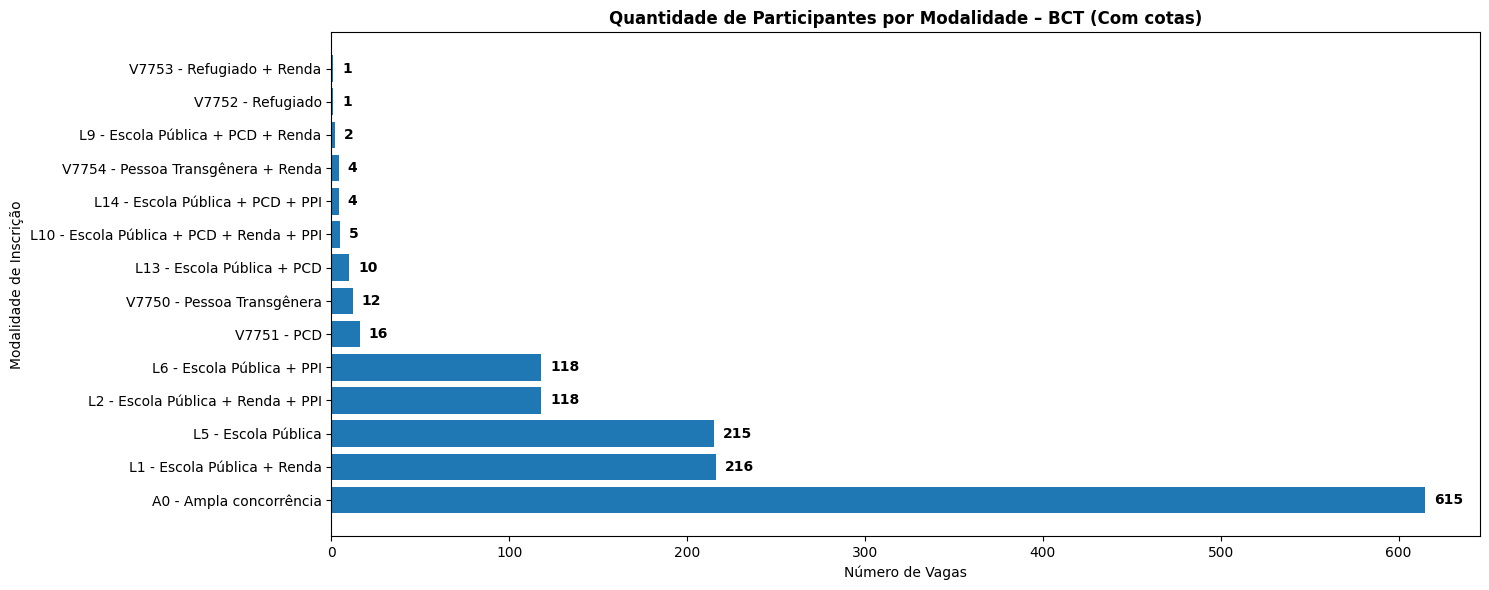

In [45]:
# Gráfico de barras
fig, ax = plt.subplots(figsize=(15, 6))
bars = ax.barh(modalidade_qtd['modalidade inscrição'], modalidade_qtd['num_vagas'], color='#1f77b4')

# Título e rótulos
ax.set_title('Quantidade de Participantes por Modalidade – BCT (Com cotas)', fontweight='bold')
ax.set_xlabel('Número de Vagas')
ax.set_ylabel('Modalidade de Inscrição')

# Adicionar os valores no final das barras
for bar in bars:
    width = bar.get_width()
    ax.text(width + 5, bar.get_y() + bar.get_height()/2,
            f'{int(width)}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [46]:
# Selecionar os 1337 maiores candidatos (por nota)
top1337 = df_bct.nlargest(1337, 'nota')

# Agrupar por modalidade inscrição
modalidade_top = top1337.groupby('modalidade inscrição').size().reset_index(name='num_candidatos')

# Ordenar para visualização mais clara
modalidade_top = modalidade_top.sort_values(by='num_candidatos', ascending=False)

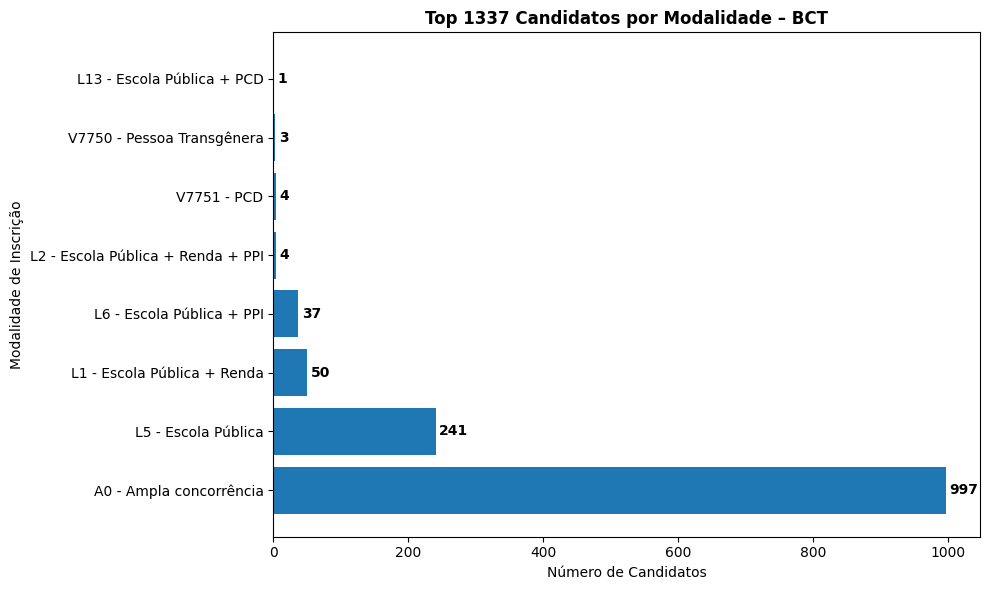

In [47]:
# Plotar
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(modalidade_top['modalidade inscrição'], modalidade_top['num_candidatos'], color='#1f77b4')

# Título e rótulos
ax.set_title('Top 1337 Candidatos por Modalidade – BCT', fontweight='bold')
ax.set_xlabel('Número de Candidatos')
ax.set_ylabel('Modalidade de Inscrição')

# Adicionar os valores nas barras
for bar in bars:
    width = bar.get_width()
    ax.text(width + 5, bar.get_y() + bar.get_height() / 2,
            f'{int(width)}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

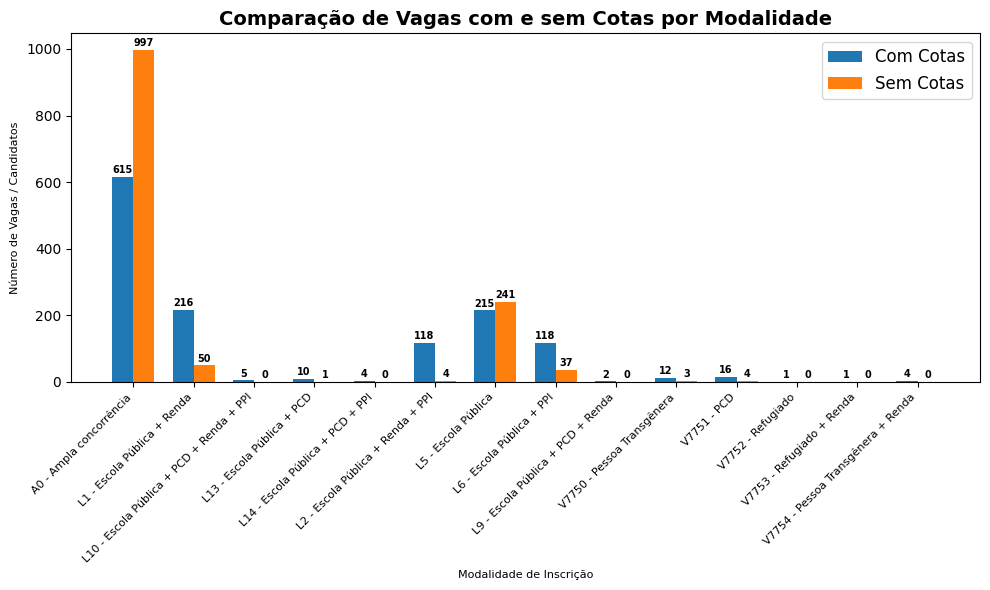

In [48]:
# Criar um dataframe com todas as modalidades únicas de ambas
all_modalidades = pd.DataFrame({'modalidade inscrição': sorted(set(modalidade_qtd['modalidade inscrição']).union(set(modalidade_top['modalidade inscrição']))) })

# Fazer merge para alinhar e preencher com zero onde faltar
modalidade_qtd_full = all_modalidades.merge(modalidade_qtd, on='modalidade inscrição', how='left').fillna(0)
modalidade_top_full = all_modalidades.merge(modalidade_top, on='modalidade inscrição', how='left').fillna(0)

# Converter para int (opcional)
modalidade_qtd_full['num_vagas'] = modalidade_qtd_full['num_vagas'].astype(int)
modalidade_top_full['num_candidatos'] = modalidade_top_full['num_candidatos'].astype(int)

import numpy as np
import matplotlib.pyplot as plt

modalidades = modalidade_qtd_full['modalidade inscrição']
ind = np.arange(len(modalidades))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(ind - width/2, modalidade_qtd_full['num_vagas'], width, label='Com Cotas', color='#1f77b4')
bars2 = ax.bar(ind + width/2, modalidade_top_full['num_candidatos'], width, label='Sem Cotas', color='#ff7f0e')

ax.set_xlabel('Modalidade de Inscrição', fontsize=8)
ax.set_ylabel('Número de Vagas / Candidatos', fontsize=8)
ax.set_title('Comparação de Vagas com e sem Cotas por Modalidade', fontsize=14, fontweight='bold')

ax.set_xticks(ind)
ax.set_xticklabels(modalidades,rotation=45, ha='right', fontsize=8)

ax.legend(fontsize=12)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 5, f'{int(height)}',
                ha='center', va='bottom', fontweight='bold', fontsize=7)

plt.tight_layout()
plt.show()


### O maior desvio padrão observado no turno noturno sugere maior heterogeneidade entre os aprovados, evidenciando desigualdades entre os aprovados.

### **Questão 8. Qual é a média da nota dos candidatos aprovados em cada curso da UFABC?**

In [49]:
media_por_curso = cr_sisu_ufabc.groupby("NOME_CURSO")["NOTA_CANDIDATO"].mean().sort_values(ascending=False).reset_index()
media_por_curso.columns = ['Curso', 'Média']
media_por_curso

,Curso,Média
0,INTERDISCIPLINAR EM CIÊNCIAS E HUMANIDADES,643.675121
1,INTERDISCIPLINAR EM CIÊNCIA E TECNOLOGIA,640.293159
2,INTERDISCIPLINAR EM CIÊNCIAS NATURAIS E EXATAS,625.950263
3,INTERDISCIPLINAR EM CIÊNCIAS HUMANAS - BI/LI,619.463080


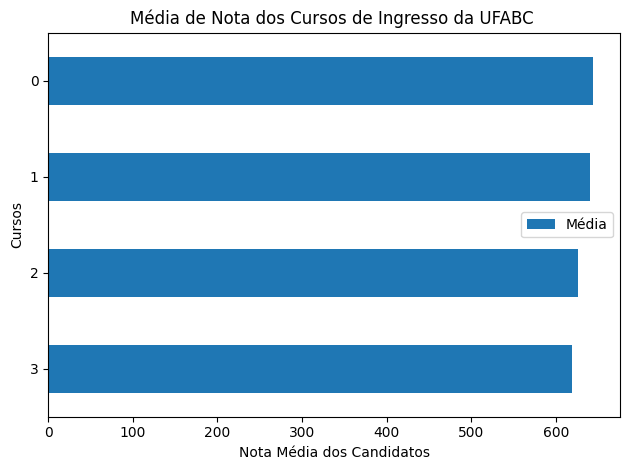

In [50]:
# Gráfico de Barras da Média das Notas Por Curso
media_por_curso.head(10).plot(kind="barh", color=colors)
plt.title("Média de Nota dos Cursos de Ingresso da UFABC ")
plt.xlabel("Nota Média dos Candidatos")
plt.ylabel("Cursos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### As médias das notas dos aprovados variam pouco entre os cursos da UFABC, indicando critérios de seleção semelhantes entre as áreas.

### **Questão 9. Qual a média da nota dos aprovados no Bacharelado em Ciência e Tecnologia matutino ou noturno?**

In [51]:
df = cr_sisu_ufabc_bct.groupby("TURNO")["NOTA_CANDIDATO"].mean().reset_index()
df.columns = ['Turno', 'Média']
df

,Turno,Média
0,Matutino,646.599567
1,Noturno,634.943461


### **Questão 10. Há maior variabilidade (desvio padrão) nas notas dos aprovados no turno noturno em comparação ao matutino?**

In [52]:
df = cr_sisu_ufabc_bct.groupby("TURNO")["NOTA_CANDIDATO"].std().reset_index()
df.columns = ['Turno', 'Desvio Pradrão']
df

,Turno,Desvio Pradrão
0,Matutino,60.411151
1,Noturno,51.958557


### **Questão 11. Estudantes com menor renda familiar tendem a optar mais pelo curso noturno do Bacharelado em Ciência e Tecnologia?**

In [53]:
# Cria uma coluna para marcar se o candidato está em uma modalidade com recorte de renda
cr_sisu_ufabc_bct['Baixa_Renda'] = cr_sisu_ufabc_bct['MOD_CONCORRENCIA'].str.contains(
    'renda familiar.*1,5 salário mínimo', case=False, na=False
)

In [54]:
# Conta o número de candidatos por turno e se são de baixa renda
turno_renda = cr_sisu_ufabc_bct.groupby(['TURNO', 'Baixa_Renda']).size().unstack().fillna(0)
turno_renda.columns = ['Alta Renda ou Não Informado', 'Baixa Renda']

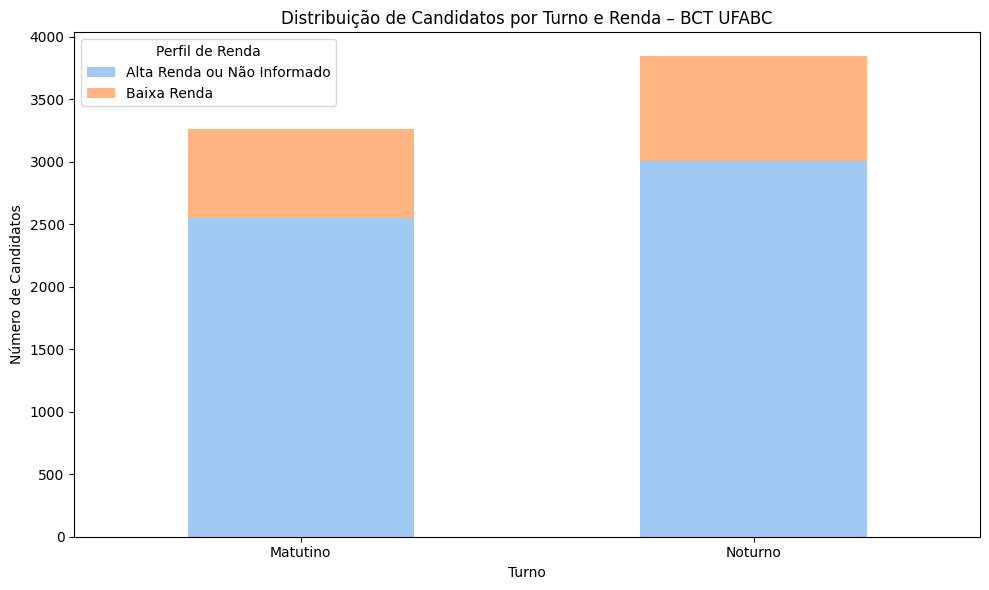

In [55]:
turno_renda.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#a1c9f4', '#ffb482'])

plt.title('Distribuição de Candidatos por Turno e Renda – BCT UFABC')
plt.xlabel('Turno')
plt.ylabel('Número de Candidatos')
plt.legend(title='Perfil de Renda')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### O turno matutino concentra maior número de candidatos de alta renda, enquanto o noturno atrai proporcionalmente mais estudantes de baixa renda, indicando relação entre renda e escolha do turno.

In [56]:
# Flag de baixa renda
cr_sisu_ufabc_bct['Baixa_Renda'] = cr_sisu_ufabc_bct['MOD_CONCORRENCIA'].str.contains(
    'renda familiar.*1,5 salário mínimo', case=False, na=False
)

# Groupby para contar candidatos por turno e faixa de renda
turno_renda = (
    cr_sisu_ufabc_bct
    .groupby(['TURNO', 'Baixa_Renda'])
    .size()
    .reset_index(name='Total')
)

turno_renda

,TURNO,Baixa_Renda,Total
0,Matutino,False,2546
1,Matutino,True,714
2,Noturno,False,3006
3,Noturno,True,837


### As análises revelam que, embora políticas como cotas ampliem o acesso, desigualdades estruturais (como renda, tipo de escola e localização) ainda influenciam significativamente o desempenho e as chances de aprovação dos candidatos.